### # In this loan prediction dataset let us gain some insights based on the criterias that whether an applicant is eligible for the loan approval.
1. Load the dataset.

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Loan_Prediction_Dataset .csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2. Understand the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.shape

(614, 13)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.shape

(614, 13)

3. Handling missing values

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# used mode for categorical data to equalise the data
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# used median for numerical term to identify skewness
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Loan Term - categorical
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

# Credit History - binary values so used mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


/tmp/ipython-input-80-2986631999.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-80-2986631999.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [ ]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

/tmp/ipython-input-81-891759981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Married'].fillna(df['Married'].mode()[0], inplace=True)


4. Convert categorical columns to numerical

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df = df.drop('Loan_ID', axis = 1)

5. **Exploratory data Analysis (EDA)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Univariate analysis
    To Analyse which gender has taken most of the loan.

<Axes: xlabel='Gender'>

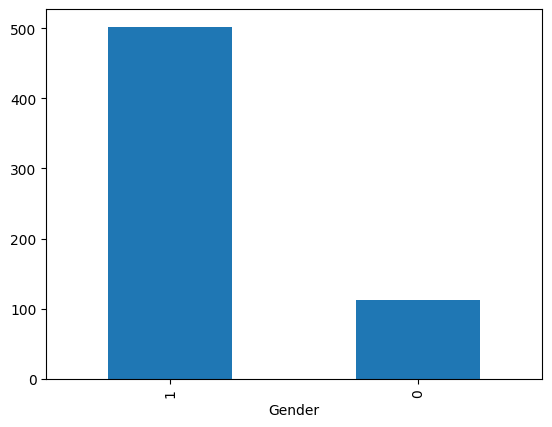

In [ ]:
df['LoanAmount'].hist(bins=20)
df['Gender'].value_counts().plot(kind='bar')

## 2. Multivariate Analysis

** To Understand relationships with the target variable

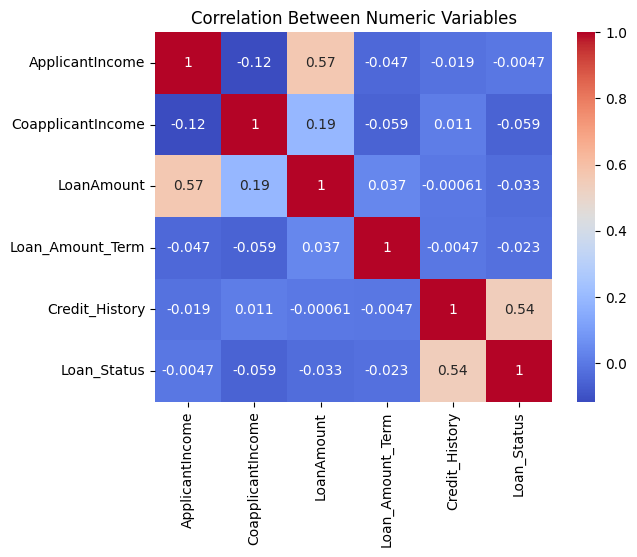

In [ ]:
corr = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History','Loan_Status']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Variables")
plt.show()

Insights:
1. Applicants with a good credit history are most likely to get loan approval.
2. If Applicants income is high there are more chances of high loan amount eligibility.
3. Coapplicant's income has very less impact than the main applicant's income on the loan amount.

6. Finding Outliers

In [ ]:
df.select_dtypes(include='number').columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

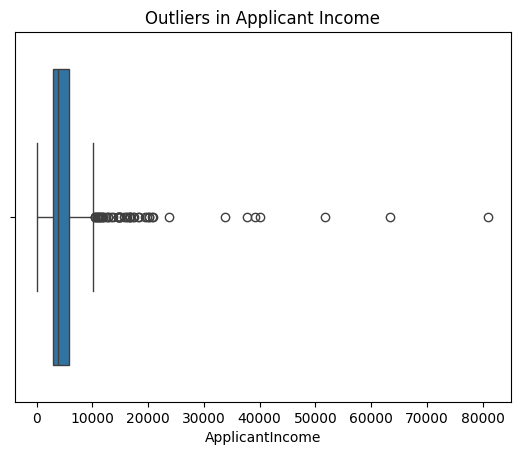

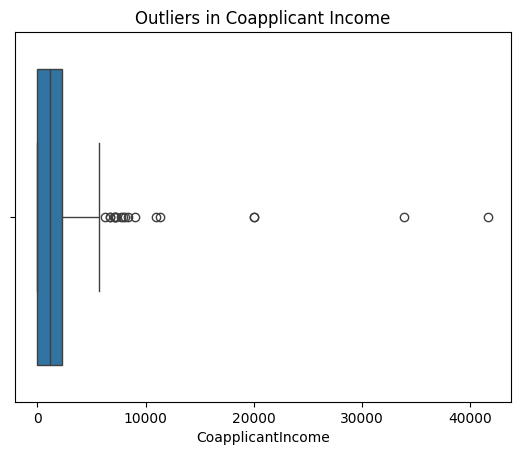

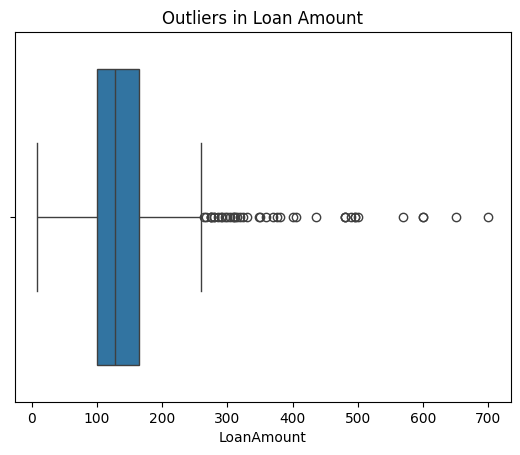

In [ ]:
# ApplicantIncome
sns.boxplot(x=df['ApplicantIncome'])
plt.title("Outliers in Applicant Income")
plt.show()

# CoapplicantIncome
sns.boxplot(x=df['CoapplicantIncome'])
plt.title("Outliers in Coapplicant Income")
plt.show()

# LoanAmount
sns.boxplot(x=df['LoanAmount'])
plt.title("Outliers in Loan Amount")
plt.show()

** 7. Transform and Remove Outliers

In [ ]:
df['ApplicantIncome_log'] = np.log1p(df['ApplicantIncome'])

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[['ApplicantIncome', 'CoapplicantIncome']] = scaler.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome']])

In [ ]:
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['LoanAmount'] >= lower) & (df['LoanAmount'] <= upper)]

In [ ]:
## Replace extreme values with a cutoff
upper_limit = df['LoanAmount'].quantile(0.95)
df['LoanAmount'] = np.where(df['LoanAmount'] > upper_limit, upper_limit, df['LoanAmount'])

/tmp/ipython-input-93-3607529671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LoanAmount'] = np.where(df['LoanAmount'] > upper_limit, upper_limit, df['LoanAmount'])


In [ ]:
# Capping ApplicantIncome at 95th percentile
applicant_cap = df['ApplicantIncome'].quantile(0.95)
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > applicant_cap, applicant_cap, df['ApplicantIncome'])

# Capping CoapplicantIncome at 95th percentile
coapplicant_cap = df['CoapplicantIncome'].quantile(0.95)
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] > coapplicant_cap, coapplicant_cap, df['CoapplicantIncome'])

/tmp/ipython-input-94-1646127384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > applicant_cap, applicant_cap, df['ApplicantIncome'])
/tmp/ipython-input-94-1646127384.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] > coapplicant_cap, coapplicant_cap, df['CoapplicantIncome'])


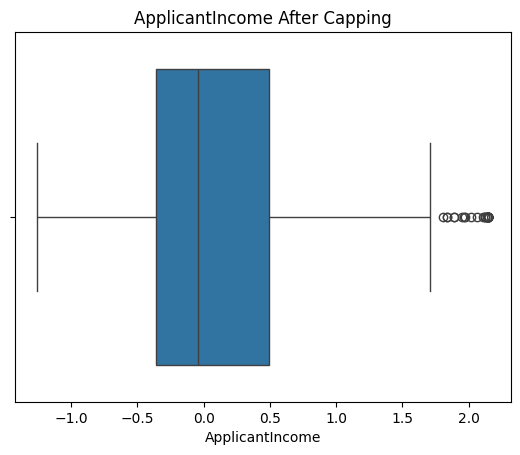

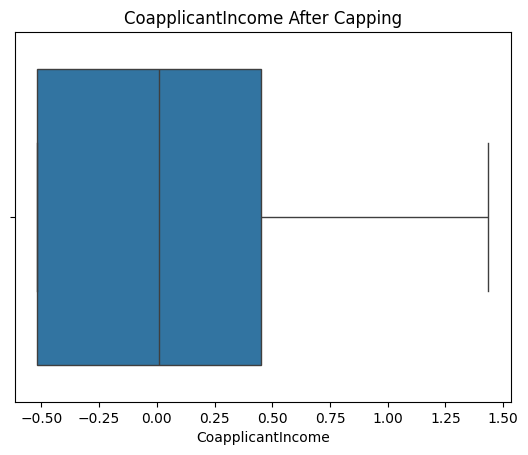

In [ ]:
sns.boxplot(x=df['ApplicantIncome'])
plt.title("ApplicantIncome After Capping")
plt.show()

sns.boxplot(x=df['CoapplicantIncome'])
plt.title("CoapplicantIncome After Capping")
plt.show()

** 8. Test train Split Data into X and Y

In [ ]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['LoanAmount', 'TotalIncome']] = scaler.fit_transform(df[['LoanAmount', 'TotalIncome']])

In [ ]:
df[['LoanAmount', 'TotalIncome']].describe()

,LoanAmount,TotalIncome
count,5.730000e+02,5.730000e+02
mean,3.937126e-16,-7.285233e-17
std,1.000874e+00,1.000874e+00
min,-2.749803e+00,-1.894393e+00
25%,-6.292173e-01,-7.537786e-01
50%,-4.663881e-02,-1.630109e-01
75%,6.524553e-01,5.401080e-01
max,1.985395e+00,4.055986e+00


In [ ]:
from sklearn.preprocessing import LabelEncoder

# List your categorical columns
cat_cols = ['Gender', 'Married', 'Dependents', 'Education',
            'Self_Employed', 'Property_Area']

# Instantiate a LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

## Training and Test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

In [ ]:
## Scaling Numerical Columns

In [ ]:
from sklearn.preprocessing import StandardScaler

# Specify numeric columns to scale
num_cols = ['LoanAmount', 'TotalIncome']

scaler = StandardScaler()

# Fit on train, transform both
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("X_train sample:\n", X_train.head())

X_train shape: (458, 13)
X_test  shape: (115, 13)
y_train distribution:
 Loan_Status
1    0.69214
0    0.30786
Name: proportion, dtype: float64
X_train sample:
      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
196       1        0           0          1              0         1.549443   
69        0        0           0          1              0         0.167095   
170       1        1           0          0              0        -0.682948   
65        1        1           0          1              0         0.655870   
17        0        0           0          1              0        -0.103685   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
196           1.115029    1.379475             360.0             1.0   
69           -0.517358    0.192661             360.0             0.0   
170           0.252693   -0.761445             360.0             1.0   
65            1.436108    1.965901             360.0             1.0   
17  

## Train a Logistic model to make predictions

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression(max_iter=1000)

# Fit on training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Predict probabilities (for ROC AUC)
y_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Accuracy
acc = accuracy_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {acc:.3f}")
print(f"ROC AUC : {roc_auc:.3f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Accuracy: 0.835
ROC AUC : 0.738

Confusion Matrix:
[[17 18]
 [ 1 79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.49      0.64        35
           1       0.81      0.99      0.89        80

    accuracy                           0.83       115
   macro avg       0.88      0.74      0.77       115
weighted avg       0.85      0.83      0.82       115



Insights:
logistic model has achieved 83.5% accuracy and ROC AUC of 0.74, but it struggled to catch all true rejections (recall for rejections ≈ 0.49).

Insight:
1. Applicants who’ve previously repaid loans on time are far more likely to be approved again.

2. The bank is risk-averse, prioritizing approvals (high recall for accepted) at the cost of letting some weak applications slip through.

Action:
1. Give extra weight to credit-history checks in your manual underwriting or automated score.

2. If reducing default risk is paramount, adjust thresholds or add balance weighting to penalize false positives more heavily.

